In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set the Seaborn style to whitegrid
sns.set(style='whitegrid')

# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'AdaptFall_DDDQN': 'C:/_source/pesbiu2.0/FallAdaptDDDQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}

# Define a custom color palette for all algorithms
color_palette = {
    'A2C': '#ff7f0e',
    'DDDQN': '#1f77b4',
    'DQN': '#9467bd',
    'AdaptFall_DDDQN': '#a1946a',
    'Fallback_DDDQN': '#8c564b',
    'Hybrid': '#2ca02c',
    'Static': '#d62728',
    'Threshold': '#FFEE58'
}

# Read each file into a DataFrame
energy_savings = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
})
latency_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Latency_Before': [],
    'Avg_Latency_After': []
})
throughput_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Throughput_Before': [],
    'Avg_Throughput_After': []
})
overall_metrics = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Avg_Latency_After': [],
    'Avg_Throughput_After': []
})

In [2]:
overall_metrics = pd.DataFrame(columns=['Algorithm','Avg_Energy_Saving','Avg_Latency_After','Avg_Throughput_After'])

for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    avg_energy_saving = df['Avg_Energy_Saving'].mean() if 'Avg_Energy_Saving' in df.columns else 0
    avg_latency_after = df['Avg_Latency_After'].mean() if 'Avg_Latency_After' in df.columns else 0
    avg_throughput_after = df['Avg_Throughput_After'].mean() if 'Avg_Throughput_After' in df.columns else 0

    new_row = {
        'Algorithm': algorithm,
        'Avg_Energy_Saving': avg_energy_saving,
        'Avg_Latency_After': avg_latency_after,
        'Avg_Throughput_After': avg_throughput_after
    }
    overall_metrics = pd.concat([overall_metrics, pd.DataFrame([new_row])], ignore_index=True)


C:\Users\xkolac15\AppData\Local\Temp\ipykernel_3288\2526045978.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overall_metrics = pd.concat([overall_metrics, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
def create_normalized_weighted_radar_chart(data, color_palette):
    # Copy data so we don't overwrite the original
    df = data.copy()
    
    # Metrics to normalize
    metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']
    
    # Normalize; invert latency so lower-latency is higher score
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        if max_val == min_val:
            # All values the same, set them to 0
            df[metric] = 0
        else:
            if metric == 'Avg_Latency_After':
                df[metric] = (max_val - df[metric]) / (max_val - min_val)
            else:
                df[metric] = (df[metric] - min_val) / (max_val - min_val)
    
    # Adjust weights (make these large enough to see a difference)
    energy_weight = 2.0
    latency_weight = 0.4
    throughput_weight = 1.5
    
    df['Avg_Energy_Saving'] *= energy_weight
    df['Avg_Latency_After'] *= latency_weight
    df['Avg_Throughput_After'] *= throughput_weight
    
    # Total score to sort
    df['Total_Score'] = df['Avg_Energy_Saving'] + df['Avg_Latency_After'] + df['Avg_Throughput_After']
    df = df.sort_values('Total_Score', ascending=False)
    
    # Print out the new normalized/weighted values to confirm they changed
    print("Normalized & Weighted Metrics:\n", df[['Algorithm'] + metrics])
    
    # Prepare angles
    N = len(metrics)
    angles = [pi/2 + 2*pi*i/N for i in range(N)]
    angles += angles[:1]  # close the loop
    
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'polar': True})
    
    # Different line styles if you like
    line_styles = ['solid', 'dashed', 'dashdot', 'dotted']
    
    # Plot each algorithm’s line
    for i, (_, row) in enumerate(df.iterrows()):
        values = row[metrics].tolist()
        values += values[:1]
        algorithm = row['Algorithm']
        
        ax.plot(
            angles,
            values,
            linewidth=2,
            linestyle=line_styles[i % len(line_styles)],
            label=algorithm,
            color=color_palette.get(algorithm, 'gray')
        )
        ax.fill(angles, values, alpha=0.05, color=color_palette.get(algorithm, 'gray'))
    
    # Axis labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Energy_Saving', 'Latency_After', 'Throughput_After'], fontsize=14)
    
    ax.set_rlabel_position(0)
    # You can adjust y-limits and ticks if you want
    plt.yticks([0.5, 1.0, 1.5, 2.0], ['0.5', '1.0', '1.5', '2.0'], fontsize=12)
    plt.ylim(0, 2.0)
    
    plt.title('Overall Efficiency Evaluation by Algorithm', fontsize=16, y=1.08)
    plt.legend(loc='upper left', bbox_to_anchor=(-0.4, 1.0), fontsize=12)
    plt.show()

# Call the new function on overall_metrics (comment out your old radar code)
normalized_metrics = create_normalized_weighted_radar_chart(overall_metrics, color_palette)

In [6]:
def plot_grouped_bars_normalized_offset(metrics_df):
    df = metrics_df.copy()
    cols = ['Avg_Energy_Saving','Avg_Latency_After','Avg_Throughput_After']
    
    for col in cols:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val != min_val:
            # Normalize to [0,1]
            df[col] = (df[col] - min_val) / (max_val - min_val)
            # Shift range to [0.1,0.9]
            df[col] = 0.1 + 0.8 * df[col]
        else:
            df[col] = 0.5
    
    melted = pd.melt(df, id_vars='Algorithm', value_vars=cols,
                     var_name='Metric', value_name='Value')
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=melted, x='Algorithm', y='Value', hue='Metric')
    plt.title('Normalized Metrics (with Offset)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


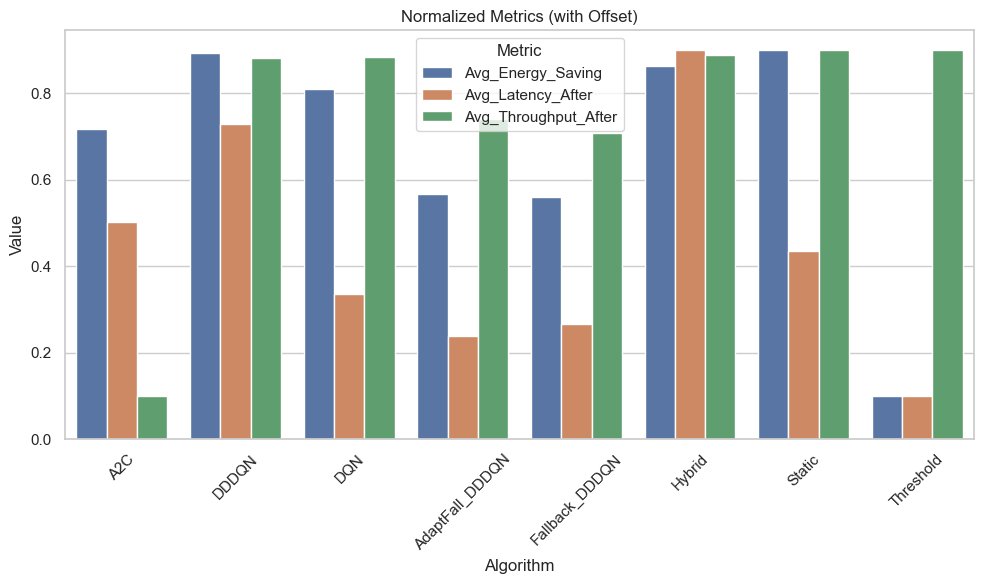

In [7]:
plot_grouped_bars_normalized_offset(overall_metrics)

In [10]:
def plot_weighted_normalized_grouped_bars(metrics_df):
    df = metrics_df.copy()
    metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']

    # Invert and normalize each metric individually
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        if max_val != min_val:
            if metric == 'Avg_Latency_After':
                df[metric] = (max_val - df[metric]) / (max_val - min_val)
            else:
                df[metric] = (df[metric] - min_val) / (max_val - min_val)
        else:
            df[metric] = 0

    # Apply your weights
    df['Avg_Energy_Saving'] *= 2.0
    df['Avg_Latency_After'] *= 0.4
    df['Avg_Throughput_After'] *= 1.5

    # Final pass: shift the entire range to avoid zero bars
    all_vals = df[metrics].values.flatten()
    gmin, gmax = all_vals.min(), all_vals.max()
    if gmax != gmin:
        df[metrics] = (df[metrics] - gmin) / (gmax - gmin)  # 0..1
        df[metrics] = 0.1 + 0.8 * df[metrics]              # 0.1..0.9
    else:
        df[metrics] = 0.5

    # Melt for grouped bars
    melted = pd.melt(
        df, 
        id_vars='Algorithm', 
        value_vars=metrics,
        var_name='Metric', 
        value_name='Value'
    )

    plt.figure(figsize=(10,6))
    sns.barplot(data=melted, x='Algorithm', y='Value', hue='Metric')
    plt.title('Weighted & Normalized Metrics by Algorithm (Offset)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



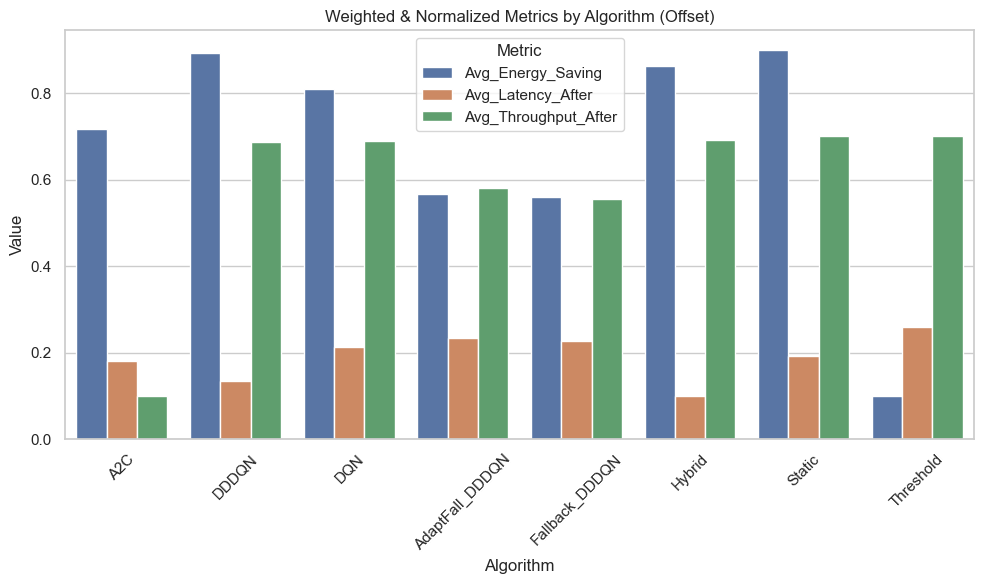

In [11]:
plot_weighted_normalized_grouped_bars(overall_metrics)

In [44]:

# Set a more academic-friendly Seaborn style
sns.set(style='ticks', context='paper', font='sans-serif', font_scale=1.5, 
        rc={'axes.labelsize': 16, 'xtick.labelsize': 14, 
            'ytick.labelsize': 14, 'legend.fontsize': 14})

In [53]:
def plot_weighted_normalized_grouped_bars_sorted_by_energy(metrics_df):
    # Sort by original Avg_Energy_Saving in descending order
    temp_df = metrics_df.copy()
    temp_df.sort_values('Avg_Energy_Saving', ascending=False, inplace=True)
    # Extract the sorted algorithm order
    algo_order = temp_df['Algorithm'].tolist()

    # Copy again to apply weights/normalization
    df = metrics_df.copy()
    metrics = ['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']

    # Invert and normalize each metric individually (like the radar chart)
    for metric in metrics:
        min_val = df[metric].min()
        max_val = df[metric].max()
        if max_val != min_val:
            if metric == 'Avg_Latency_After':
                # Lower latency => higher normalized value
                df[metric] = (max_val - df[metric]) / (max_val - min_val)
            else:
                df[metric] = (df[metric] - min_val) / (max_val - min_val)
        else:
            df[metric] = 0

    # Apply your weights
    df['Avg_Energy_Saving']    *= 2.0
    df['Avg_Latency_After']    *= 0.4
    df['Avg_Throughput_After'] *= 1.5

    # Final pass: shift entire range to avoid zero bars
    all_vals = df[metrics].values.flatten()
    gmin, gmax = all_vals.min(), all_vals.max()
    if gmax != gmin:
        df[metrics] = (df[metrics] - gmin) / (gmax - gmin)  # Scale to 0..1
        df[metrics] = 0.1 + 0.8 * df[metrics]              # Shift to 0.1..0.9
    else:
        df[metrics] = 0.5

    # Melt for grouped bars
    melted = pd.melt(
        df,
        id_vars='Algorithm',
        value_vars=metrics,
        var_name='Metric',
        value_name='Normalized Value [0.0-1.0]'
    )
   
    plt.figure(figsize=(13,6))
    sns.barplot(
        data=melted,
        x='Algorithm',
        y='Normalized Value [0.0-1.0]',
        hue='Metric',
        order=algo_order  # enforce the sorted order
    )
    #plt.title('Weighted & Normalized Metrics by Algorithm (Sorted by Energy Saving)')
    plt.xticks(rotation=45)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Algorithm', fontsize=20)
    plt.ylabel('Normalized Values [0.0-1.0]', fontsize=20)
    plt.ylim(0, 1.0)
    sns.despine(trim=True)
    plt.legend(title='Algorithm', fontsize=16, title_fontsize=16, loc='center right', bbox_to_anchor=(1.4, 0.5))
    plt.tight_layout()
    plt.show()


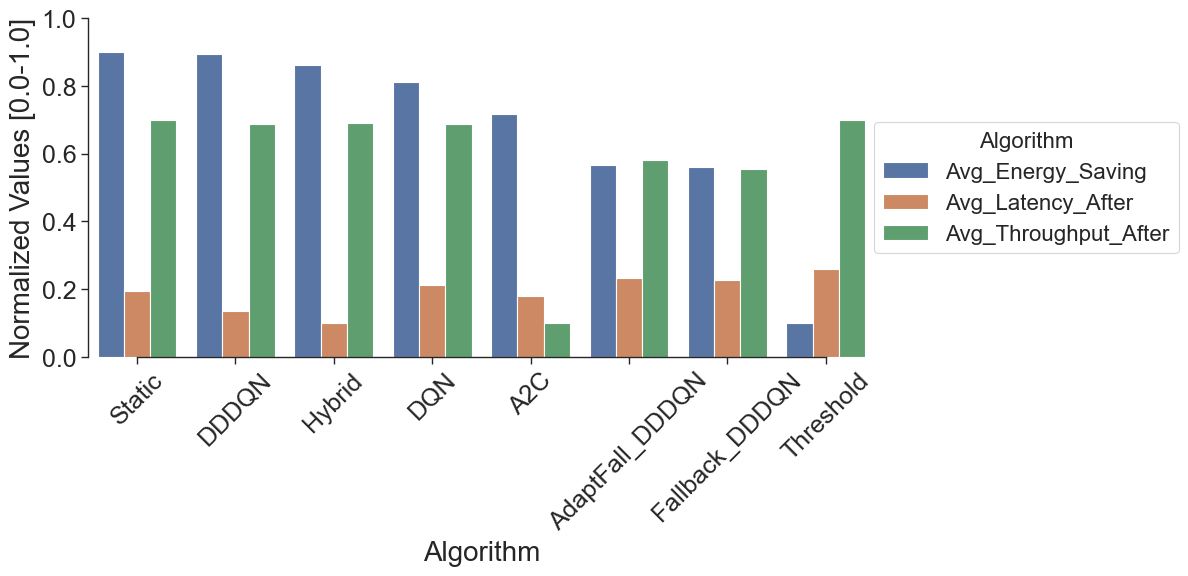

In [54]:
plot_weighted_normalized_grouped_bars_sorted_by_energy(overall_metrics)